# Data Exploration and Preparation

This notebook explores the asthma, emissions, and mortality datasets and prepares them for analysis.

In [41]:
pip install pandas numpy seaborn geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/8d/2c/c761e6adeb81bd4029a137b3240e7214a8c9aaf225883356196afd6ef9d8/pyogrio-0.10.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/2d/4d/610fe2a17de71b4fe210af69ce25f2d65379ba0a48299129894d0d0988ee/pyproj-3.7.0-cp311-cp311-macosx_14_0_arm64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/37/63/e182e43081fffa0a2d970c480f2ef91647a6ab94098f61748c23c2a485f2/shapely-2.0.6-cp311-cp311-macosx_11_0_arm64.whl.metadata
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
   ━━━━━

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display

## 1. Load and Examine Raw Data

In [4]:
# Load datasets
asthma_df = pd.read_csv('./AsthmaTotals.csv')
emissions_df = pd.read_csv('./emissions.csv')
mortality_df = pd.read_csv('./Mortality-Rates-by-State.csv')

print("\nAsthma Data Sample:")
display(asthma_df.head())
print("\nShape:", asthma_df.shape)
print("\nColumns:", asthma_df.columns.tolist())

print("\nEmissions Data Sample:")
display(emissions_df.head())
print("\nShape:", emissions_df.shape)
print("\nColumns:", emissions_df.columns.tolist())

print("\nMortality Data Sample:")
display(mortality_df.head())
print("\nShape:", mortality_df.shape)
print("\nColumns:", mortality_df.columns.tolist())


Asthma Data Sample:


,State,Total,Year
0,Alabama,353847,2014
1,Alaska,44865,2014
2,Arizona,484115,2014
3,Arkansas,197478,2014
4,California,2279568,2014



Shape: (357, 3)

Columns: ['State', 'Total', 'Year']

Emissions Data Sample:


,year,state-name,sector-name,fuel-name,value
0,1970,Alabama,Industrial carbon dioxide emissions,Coal,26.721507
1,1970,Alabama,Industrial carbon dioxide emissions,Petroleum,3.577779
2,1970,Alabama,Industrial carbon dioxide emissions,Natural Gas,8.944097
3,1970,Alabama,Industrial carbon dioxide emissions,All Fuels,39.243383
4,1970,Alabama,Total carbon dioxide emissions from all sectors,All Fuels,102.646851



Shape: (59901, 5)

Columns: ['year', 'state-name', 'sector-name', 'fuel-name', 'value']

Mortality Data Sample:


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,"Mor ality Rates by State and Sex, 2003-2021",Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,State,2003-Total,2004-Total,2005-Total,2006-Total,2007-Total,2008-Total,2009-Total,2010-Total,2011-Total,2012-Total,2013-Total,2014-Total,2015-Total,2016-Total,2017-Total,2018-Total,2019-Total,2020-Total,2021-Total
1,Alabama,64.9,62.7,63.8,60.2,61.6,58.8,61.6,60,57,54.1,54.7,52.6,49.1,49,46.7,45.8,41.9,40.8,40
2,Alaska,55.7,57.4,51,46.2,55.2,53,55.3,49.4,49.4,50,47,40.3,41.5,38.4,31.4,31.4,30.5,32.1,33.1
3,Arizona,48.3,46.2,43.3,43,39.4,38.6,39.9,39,36.8,37.1,35.4,33.2,34.5,30.4,30.6,27.9,25.4,25.3,26.3
4,Arkansas,67.4,68.9,70.4,65.4,63.7,67.8,64.7,63,61.3,60.8,60.5,56.2,57.1,53.1,51,47.4,45.7,45.9,44



Shape: (53, 20)

Columns: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Mor ality Rates by State and Sex, 2003-2021', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']


## 2. Process and Clean Data

In [5]:
# Process mortality data
def process_mortality_data(df):
    # Get the year columns
    year_cols = [col for col in df.columns if isinstance(col, str) and 'Total' in col]
    if not year_cols:
        year_cols = [col for col in df.columns if 'Unnamed' in str(col)]
    
    # Create new dataframe
    processed_data = []
    states = df.iloc[1:, 0].dropna().values
    
    for col in year_cols:
        year_value = df.iloc[0][col]
        year = str(year_value).split('-')[0]
        if year.isdigit():
            rates = df[col].iloc[1:].values
            for state, rate in zip(states, rates):
                if pd.notna(state) and pd.notna(rate):
                    try:
                        rate_value = float(str(rate).replace(',', ''))
                        processed_data.append({
                            'State': state.strip(),
                            'Year': int(year),
                            'Mortality_Rate': rate_value
                        })
                    except:
                        continue
    
    return pd.DataFrame(processed_data)

# Process emissions data
def process_emissions_data(df):
    # Filter for total emissions
    total_emissions = df[
        (df['sector-name'] == 'Total carbon dioxide emissions from all sectors') &
        (df['fuel-name'] == 'All Fuels')
    ]
    
    # Group and rename
    emissions_grouped = total_emissions.groupby(['year', 'state-name'])['value'].sum().reset_index()
    emissions_grouped.columns = ['Year', 'State', 'Total_Emissions']
    return emissions_grouped

# Process the data
mortality_processed = process_mortality_data(mortality_df)
emissions_processed = process_emissions_data(emissions_df)
asthma_processed = asthma_df.copy()

print("Processed Data Samples:")
print("\nMortality Data:")
display(mortality_processed.head())
print("\nEmissions Data:")
display(emissions_processed.head())
print("\nAsthma Data:")
display(asthma_processed.head())

Processed Data Samples:

Mortality Data:


,State,Year,Mortality_Rate
0,Alabama,2003,64.9
1,Alaska,2003,55.7
2,Arizona,2003,48.3
3,Arkansas,2003,67.4
4,California,2003,43.8



Emissions Data:


,Year,State,Total_Emissions
0,1970,Alabama,102.646851
1,1970,Alaska,11.348910
2,1970,Arizona,24.906189
3,1970,Arkansas,36.178889
4,1970,California,294.372200



Asthma Data:


,State,Total,Year
0,Alabama,353847,2014
1,Alaska,44865,2014
2,Arizona,484115,2014
3,Arkansas,197478,2014
4,California,2279568,2014


## 3. Merge Datasets

In [12]:
# First merge asthma and emissions
merged_df = pd.merge(asthma_processed, emissions_processed, 
                    on=['Year', 'State'], 
                    how='inner')

# Then merge with mortality
merged_df = pd.merge(merged_df, mortality_processed, 
                    on=['Year', 'State'], 
                    how='inner')

print("Merged Data Sample:")
display(merged_df.head())
display(merged_df[merged_df['Year'] == 2015].head())
display(merged_df[merged_df['Year'] == 2016].head())
print("\nShape:", merged_df.shape)
print("\nColumns:", merged_df.columns.tolist())

Merged Data Sample:


,State,Total,Year,Total_Emissions,Mortality_Rate
0,Alabama,353847,2014,122.633476,52.6
1,Alaska,44865,2014,33.919438,40.3
2,Arizona,484115,2014,97.295433,33.2
3,Arkansas,197478,2014,68.914215,56.2
4,California,2279568,2014,345.386127,30.6


,State,Total,Year,Total_Emissions,Mortality_Rate
48,Alabama,370128,2015,119.202912,49.1
49,Alaska,50792,2015,35.027903,41.5
50,Arizona,479791,2015,94.982903,34.5
51,Arkansas,226691,2015,59.054015,57.1
52,California,2290491,2015,351.421508,29.9


,State,Total,Year,Total_Emissions,Mortality_Rate
96,Alabama,365041,2016,113.986483,49.0
97,Alaska,48398,2016,33.405683,38.4
98,Arizona,491794,2016,90.860970,30.4
99,Arkansas,193863,2016,62.127003,53.1
100,California,2366008,2016,353.372145,27.7



Shape: (336, 5)

Columns: ['State', 'Total', 'Year', 'Total_Emissions', 'Mortality_Rate']


## 4. Add Population Data

In [26]:
# Import population data from Census file
pop_df = pd.read_csv('./nst-est2020.csv')

# Create list to store population data
population_data = []

# Map column names to years
year_cols = {
    'POPESTIMATE2014': 2014,
    'POPESTIMATE2015': 2015, 
    'POPESTIMATE2016': 2016,
    'POPESTIMATE2017': 2017,
    'POPESTIMATE2018': 2018,
    'POPESTIMATE2019': 2019,
    'POPESTIMATE2020': 2020
}

# Process each year's data
for col, year in year_cols.items():
    # Get population data for each state and year
    year_data = pop_df[['NAME', col]].copy()
    year_data.columns = ['State', 'Population']
    year_data['Year'] = year
    
    # Remove territories and DC
    year_data = year_data[~year_data['State'].isin(['Puerto Rico', 'District of Columbia'])]
    
    population_data.append(year_data)

# Combine all years into single dataframe    
population_df = pd.concat(population_data, ignore_index=True)

# Merge population data with main dataset
final_df = pd.merge(merged_df, population_df, on=['State', 'Year'], how='left')

#calc the perc capita rates for each state
final_df['Asthma_Rate_per_Capita'] = final_df['Total'] / final_df['Population']  # Cases per capita
final_df['Emissions_per_Capita'] = final_df['Total_Emissions'] / final_df['Population']  # Emissions per person
# Display data before per capita calculations
print("\nBefore per capita calculations:")
display(final_df[['State', 'Year', 'Total', 'Total_Emissions', 'Population', 'Mortality_Rate']].head())


# Convert mortality rates to per capita (from per 100,000)
final_df['Mortality_Rate_per_Capita'] = final_df['Mortality_Rate'] / 100000

# Drop the original mortality rate column
final_df = final_df.drop('Mortality_Rate', axis=1)

print("\nAfter converting mortality rates to per capita:")
display(final_df[['State', 'Year', 'Asthma_Rate_per_Capita', 'Emissions_per_Capita', 'Mortality_Rate_per_Capita']].head())

print("\n Each year:")
display(final_df[['State', 'Year', 'Asthma_Rate_per_Capita', 'Emissions_per_Capita', 'Mortality_Rate_per_Capita']][final_df['Year'] == 2015].head())
display(final_df[['State', 'Year', 'Asthma_Rate_per_Capita', 'Emissions_per_Capita', 'Mortality_Rate_per_Capita']][final_df['Year'] == 2016].head())



Before per capita calculations:


,State,Year,Total,Total_Emissions,Population,Mortality_Rate
0,Alabama,2014,353847,122.633476,4843737.0,52.6
1,Alaska,2014,44865,33.919438,737075.0,40.3
2,Arizona,2014,484115,97.295433,6732873.0,33.2
3,Arkansas,2014,197478,68.914215,2968759.0,56.2
4,California,2014,2279568,345.386127,38586706.0,30.6



After converting mortality rates to per capita:


,State,Year,Asthma_Rate_per_Capita,Emissions_per_Capita,Mortality_Rate_per_Capita
0,Alabama,2014,0.073052,0.000025,0.000526
1,Alaska,2014,0.060869,0.000046,0.000403
2,Arizona,2014,0.071903,0.000014,0.000332
3,Arkansas,2014,0.066519,0.000023,0.000562
4,California,2014,0.059077,0.000009,0.000306



After converting mortality rates to per capita:


,State,Year,Asthma_Rate_per_Capita,Emissions_per_Capita,Mortality_Rate_per_Capita
48,Alabama,2015,0.076240,0.000025,0.000491
49,Alaska,2015,0.068784,0.000047,0.000415
50,Arizona,2015,0.070219,0.000014,0.000345
51,Arkansas,2015,0.076078,0.000020,0.000571
52,California,2015,0.058875,0.000009,0.000299


,State,Year,Asthma_Rate_per_Capita,Emissions_per_Capita,Mortality_Rate_per_Capita
96,Alabama,2016,0.075006,0.000023,0.000490
97,Alaska,2016,0.065176,0.000045,0.000384
98,Arizona,2016,0.070815,0.000013,0.000304
99,Arkansas,2016,0.064798,0.000021,0.000531
100,California,2016,0.060436,0.000009,0.000277


## 5. Coorelations

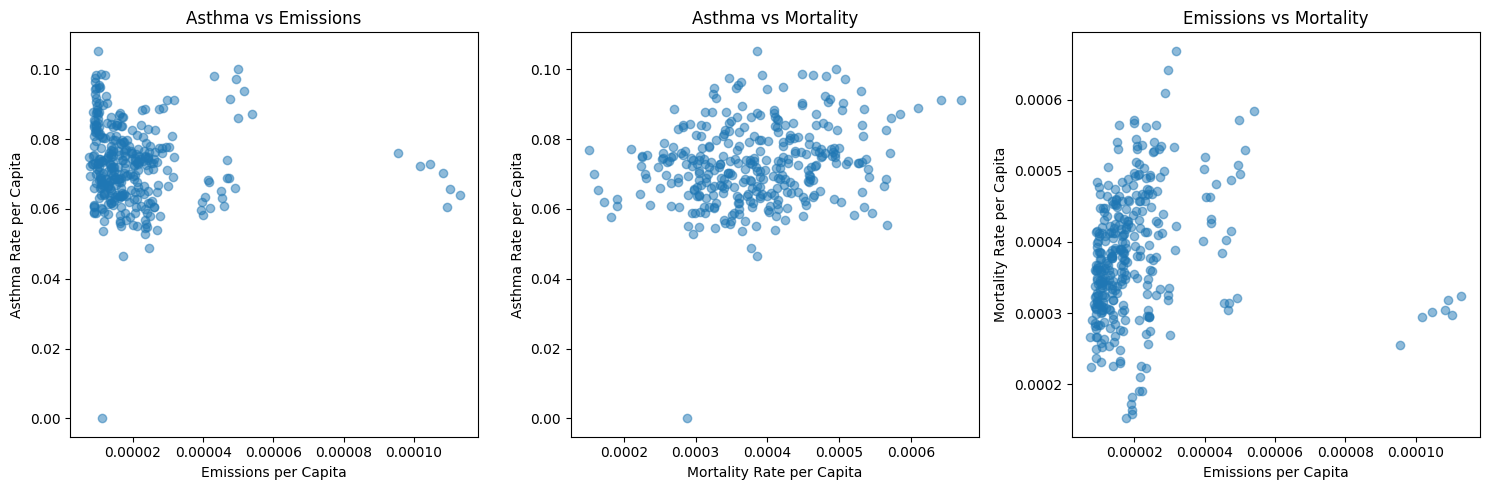

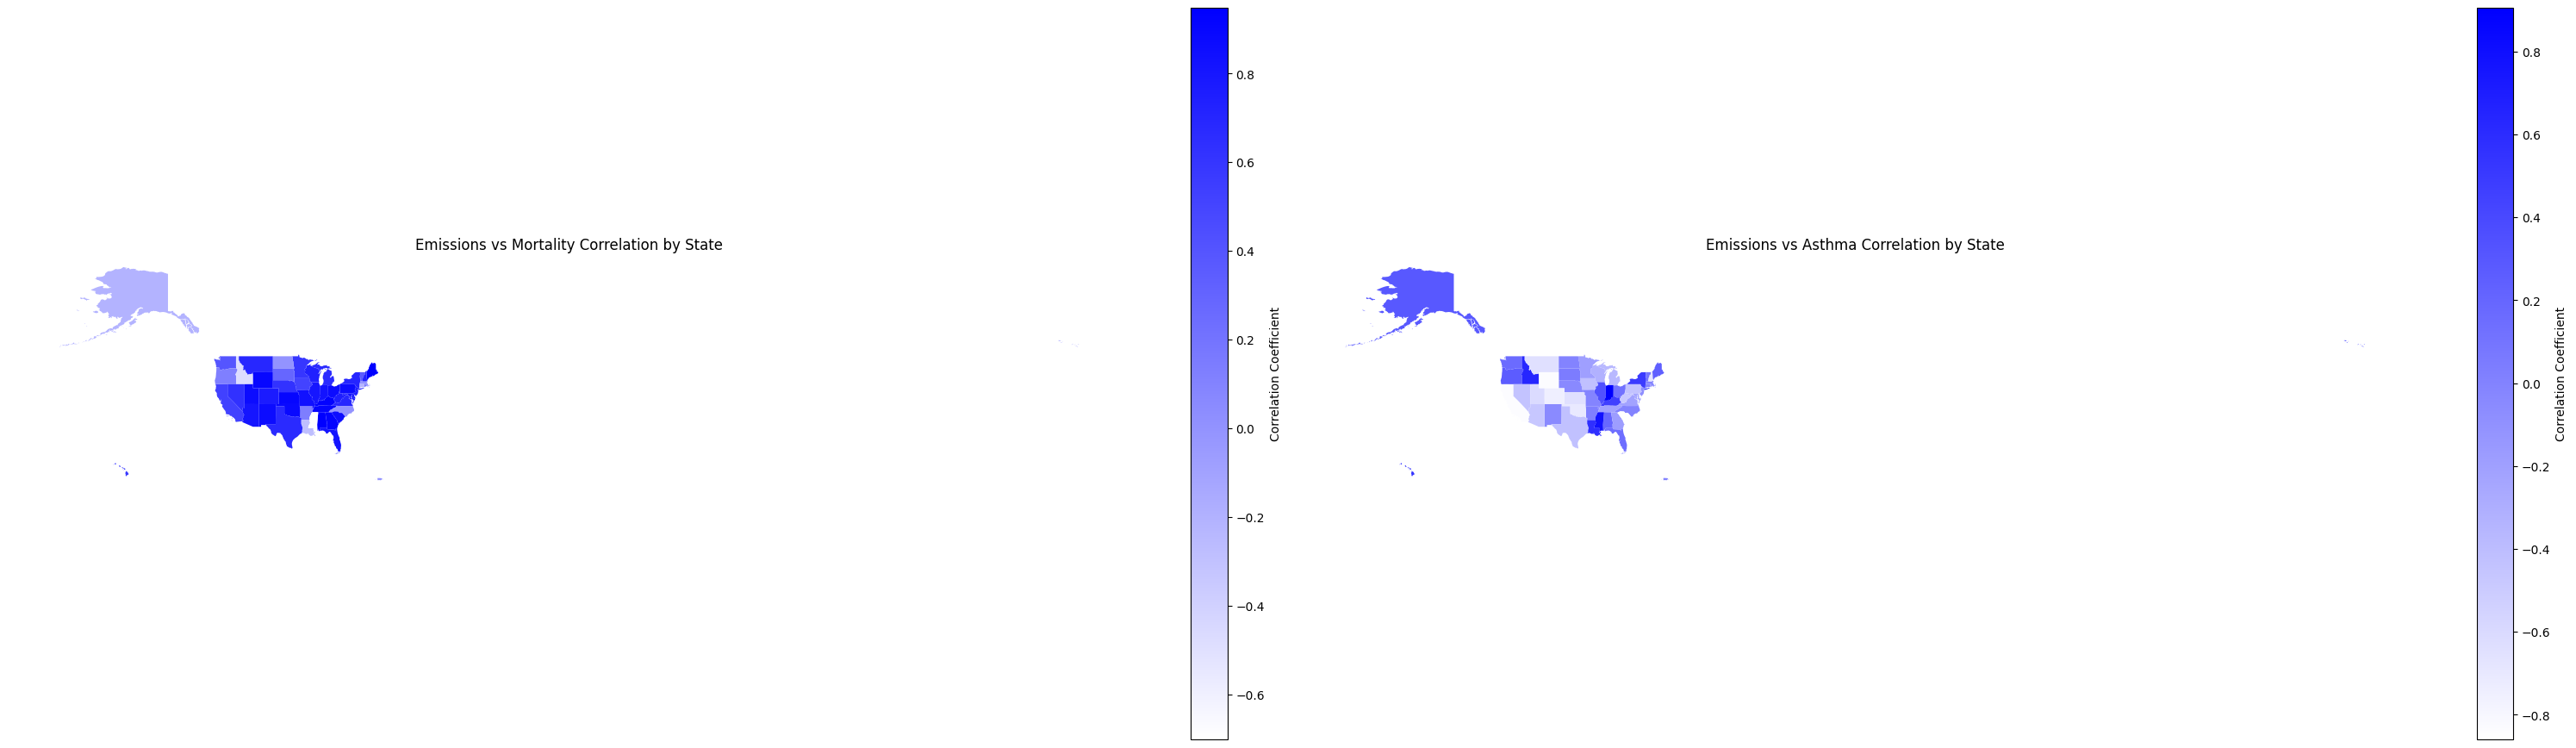


Correlations by State:
Alabama: 0.192
Alaska: 0.297
Arizona: -0.467
Arkansas: 0.024
California: -0.836
Colorado: -0.743
Connecticut: -0.000
Delaware: -0.762
District of Columbia: nan
Florida: 0.143
Georgia: -0.182
Hawaii: 0.536
Idaho: 0.641
Illinois: 0.349
Indiana: 0.905
Iowa: -0.422
Kansas: -0.644
Kentucky: 0.460
Louisiana: 0.578
Maine: 0.246
Maryland: -0.233
Michigan: -0.367
Minnesota: -0.193
Mississippi: 0.775
Missouri: -0.007
Montana: -0.641
Nebraska: -0.045
Nevada: -0.441
New Hampshire: -0.678
New Jersey: -0.075
New Mexico: -0.049
New York: 0.492
Ohio: 0.113
Oklahoma: -0.706
Oregon: 0.268
Pennsylvania: -0.443
Rhode Island: -0.096
South Carolina: -0.859
South Dakota: 0.046
Tennessee: -0.215
Texas: -0.428
Utah: -0.610
Vermont: 0.094
Virginia: -0.217
Washington: 0.163
West Virginia: -0.476
Wisconsin: -0.320
Wyoming: -0.835


In [78]:
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap

# Calculate correlations
correlation_matrix = final_df[['Asthma_Rate_per_Capita', 'Emissions_per_Capita', 'Mortality_Rate_per_Capita']].corr()

# Create scatter plots for each pair of variables
plt.figure(figsize=(15, 5))

# Asthma vs Emissions
plt.subplot(131)
plt.scatter(final_df['Emissions_per_Capita'], final_df['Asthma_Rate_per_Capita'], alpha=0.5)
plt.xlabel('Emissions per Capita')
plt.ylabel('Asthma Rate per Capita')
plt.title('Asthma vs Emissions')

# Asthma vs Mortality
plt.subplot(132)
plt.scatter(final_df['Mortality_Rate_per_Capita'], final_df['Asthma_Rate_per_Capita'], alpha=0.5)
plt.xlabel('Mortality Rate per Capita') 
plt.ylabel('Asthma Rate per Capita')
plt.title('Asthma vs Mortality')

# Emissions vs Mortality
plt.subplot(133)
plt.scatter(final_df['Emissions_per_Capita'], final_df['Mortality_Rate_per_Capita'], alpha=0.5)
plt.xlabel('Emissions per Capita')
plt.ylabel('Mortality Rate per Capita')
plt.title('Emissions vs Mortality')

plt.tight_layout()
plt.show()

# Load US states map data
us_map = gpd.read_file('./cb_2018_us_state_20m.zip')

# Create custom colormaps for positive/negative correlations
colors_pos = [(1, 1, 1), (0, 0, 1)]  # White to blue
colors_neg = [(1, 1, 1), (1, 0, 0)]  # White to red
cmap_pos = LinearSegmentedColormap.from_list('custom_pos', colors_pos)
cmap_neg = LinearSegmentedColormap.from_list('custom_neg', colors_neg)

# Create figure with 2 subplots (one for each comparison)
fig, axes = plt.subplots(1, 2, figsize=(30, 15))

def calc_correlation_stats(state, var1, var2):
    # Get data for this state across all years
    state_data = final_df[final_df['State'] == state]
    
    # Need at least 2 data points for correlation
    if len(state_data) >= 2:
        # Calculate correlation between the two variables
        correlation = state_data[var1].corr(state_data[var2])
        return correlation if not np.isnan(correlation) else 0
    return 0

# Emissions vs Mortality
us_map['correlation'] = us_map['NAME'].apply(lambda state:
    calc_correlation_stats(state, 'Emissions_per_Capita', 'Mortality_Rate_per_Capita'))

us_map.plot(column='correlation', ax=axes[0],
            cmap=cmap_pos,
            legend=True,
            legend_kwds={'label': 'Correlation Coefficient', 'fraction': 0.03},
            missing_kwds={'color': 'lightgrey'})
axes[0].set_title('Emissions vs Mortality Correlation by State')
axes[0].axis('off')

# Emissions vs Asthma
us_map['correlation'] = us_map['NAME'].apply(lambda state:
    calc_correlation_stats(state, 'Emissions_per_Capita', 'Asthma_Rate_per_Capita'))

us_map.plot(column='correlation', ax=axes[1],
            cmap=cmap_pos,
            legend=True,
            legend_kwds={'label': 'Correlation Coefficient', 'fraction': 0.03},
            missing_kwds={'color': 'lightgrey'})
axes[1].set_title('Emissions vs Asthma Correlation by State')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Print actual correlation values for each state
print("\nCorrelations by State:")
for state in final_df['State'].unique():
    state_data = final_df[final_df['State'] == state]
    correlation = state_data['Emissions_per_Capita'].corr(state_data['Asthma_Rate_per_Capita'])
    print(f"{state}: {correlation:.3f}")
